In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sld = pd.read_csv("Files/datasets/Salary_Data.csv")
sld.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


<Axes: xlabel='Age', ylabel='Salary'>

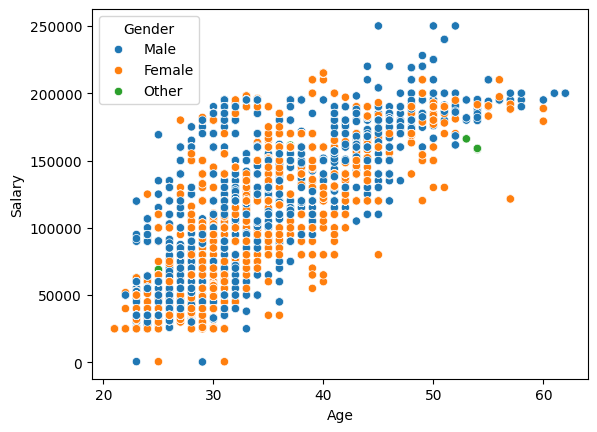

In [3]:
sns.scatterplot(sld, x="Age", y="Salary", hue="Gender")

In [4]:
sld = sld.drop(labels=["Education Level", "Job Title", "Gender"], axis=1)
sld.head()

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


In [5]:
sld = sld.fillna(sld.mean().round(1))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sld.drop("Years of Experience", axis=1), sld["Years of Experience"], test_size=0.3)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4692, 2), (2012, 2), (4692,), (2012,))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
X_train_scaled

,Age,Salary
0,0.310778,-0.761075
1,-1.264657,-1.139117
2,-0.608226,1.223643
3,-0.870798,-1.422648
4,-0.739512,-0.666565
...,...,...
4687,2.280071,1.412664
4688,1.492354,1.318154
4689,2.148785,2.546789
4690,-0.870798,0.845602


In [11]:
np.round(X_train.describe(), 1)

,Age,Salary
count,4692.0,4692.0
mean,33.6,115264.1
std,7.6,52909.9
min,21.0,500.0
25%,28.0,70000.0
50%,32.0,115000.0
75%,38.0,160000.0
max,62.0,250000.0


In [12]:
np.round(X_train_scaled.describe(), 1)

,Age,Salary
count,4692.0,4692.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.7,-2.2
25%,-0.7,-0.9
50%,-0.2,-0.0
75%,0.6,0.8
max,3.7,2.5


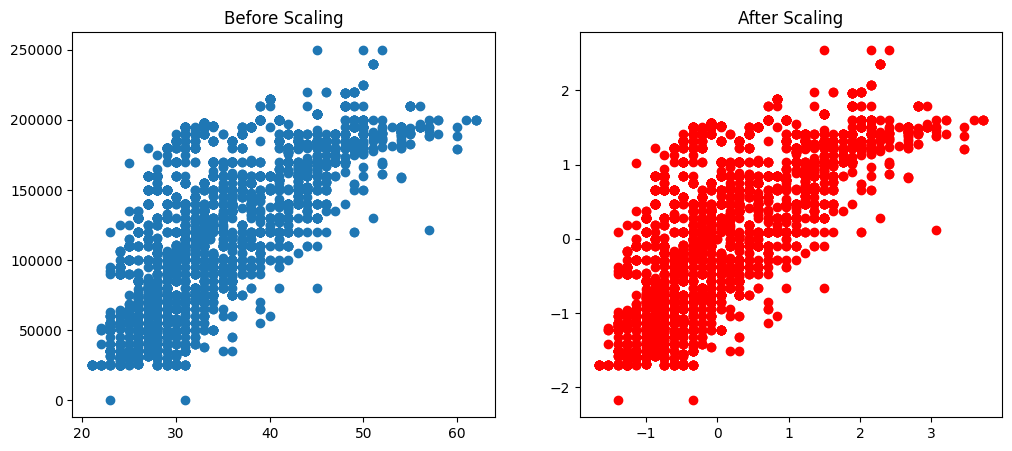

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train["Age"], X_train["Salary"])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Age"], X_train_scaled["Salary"], color="red")
ax2.set_title("After Scaling")

plt.show()

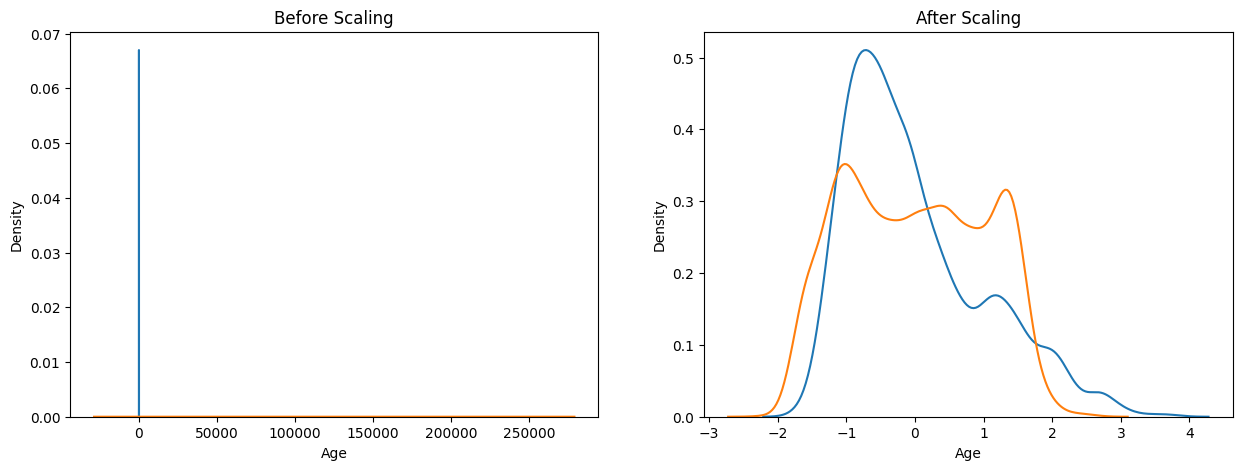

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15, 5))

sns.kdeplot(X_train["Age"], ax=ax1)
sns.kdeplot(X_train["Salary"], ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(X_train_scaled["Age"], ax=ax2)
sns.kdeplot(X_train_scaled["Salary"], ax=ax2)
ax2.set_title("After Scaling")

plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

lr_original = LinearRegression()
lr_scaled = LinearRegression()

In [16]:
sld.isna().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

In [17]:
lr_original.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = lr_original.predict(X_test)    
y_pred_scaled = lr_scaled.predict(X_test_scaled)